In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Handling Missing Values

In [4]:
nan_values=[feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in nan_values:
    print("{}: {}".format(feature,df[feature].isnull().sum()))

children: 4
country: 488
agent: 16340
company: 112593


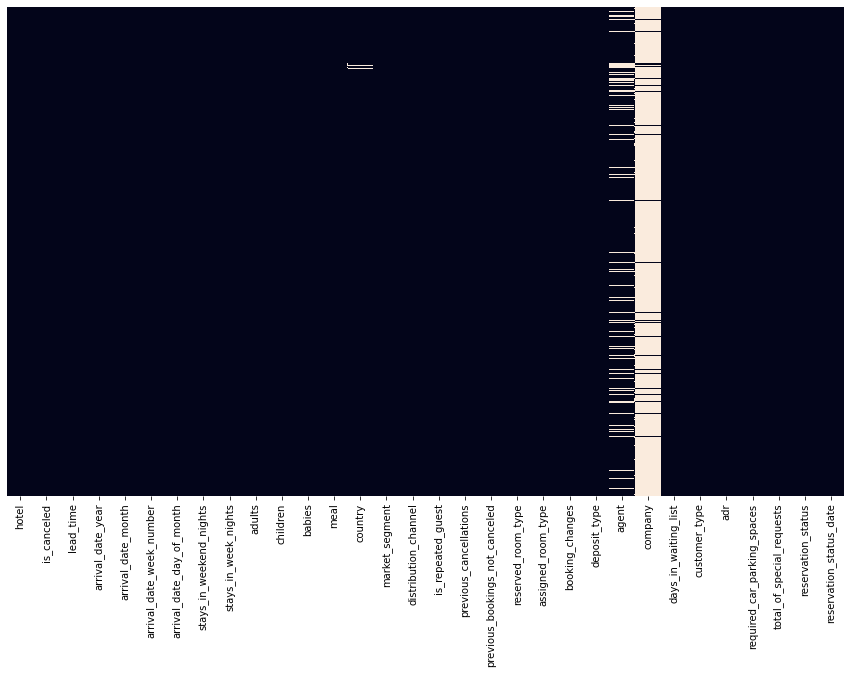

In [5]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isna(),cbar=False,yticklabels=False)

In [6]:
df.drop(['agent','company'],axis=1,inplace=True)

In [7]:
df['country'].value_counts().index[0]

'PRT'

In [8]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [9]:
df.fillna(0,inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
# filter1 = ((df['children']==0) & (df['adults']==0) & (df['babies']==0))#Since adults,children and babies cannot be 0(means no booking)

In [12]:
# df= df[~filter1]

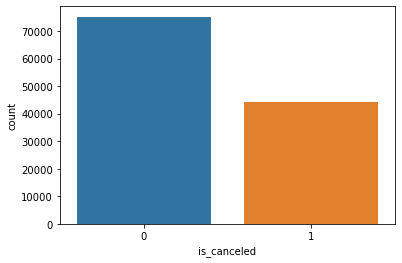

In [13]:
#checking for imbalanced dataset
sns.countplot(df['is_canceled'])

In [14]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

# EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### Univariate Analysis


In [17]:
is_cancellation = len(df[df['is_canceled']==1])
print("Percentage cancellation=",is_cancellation/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancellation= 0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In [18]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Cancelations in resort hotel= 0.27763354967548676
Cancelations in city hotel= 0.41726963317786464


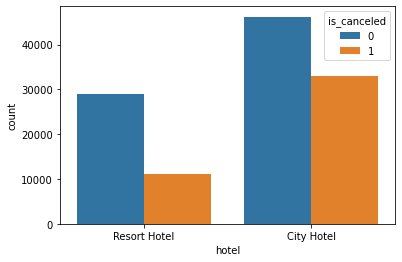

In [19]:
sns.countplot(data=df,x='hotel',hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel=',(len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel=',(len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

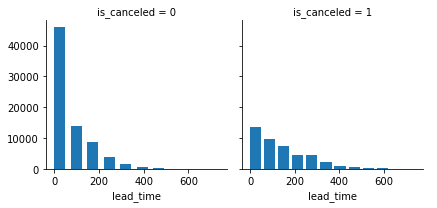

In [20]:
grid= sns.FacetGrid(df,col='is_canceled')
grid.map(plt.hist,'lead_time',width=50)
grid.add_legend()

In [21]:
print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)]))

715


Cancelations among new guests= 0.3778508392455442
Cancelations among old guests= 0.14488188976377953


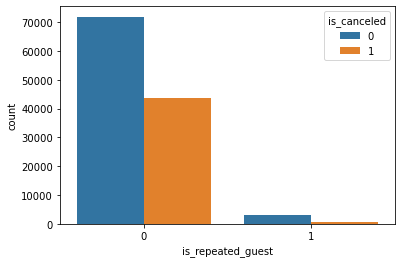

In [22]:
sns.countplot(data=df,x='is_repeated_guest',hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests=',(len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests=',(len(old_guest))/(len(df[df['is_repeated_guest']==1])))

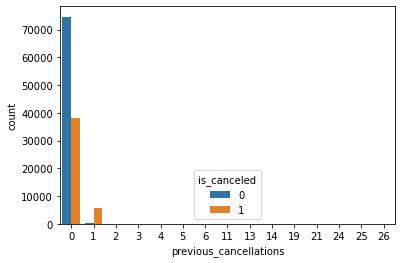

In [23]:
sns.countplot(data=df,x='previous_cancellations',hue='is_canceled')

In [24]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

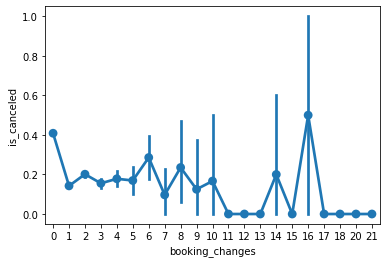

In [25]:
sns.pointplot(data=df,x='booking_changes', y='is_canceled')

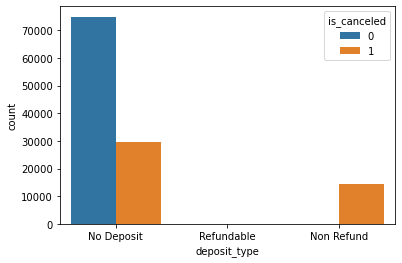

In [26]:
sns.countplot(x='deposit_type',hue='is_canceled',data=df)

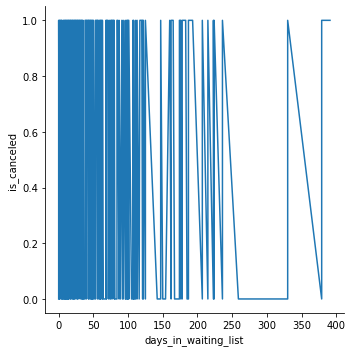

In [27]:
sns.relplot(data=df,x='days_in_waiting_list',y='is_canceled',kind='line',estimator=None)

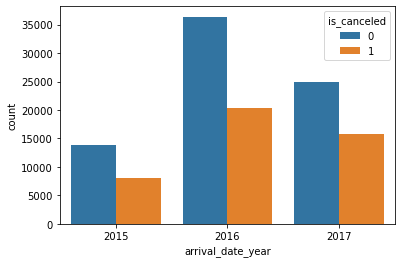

In [28]:
sns.countplot(data=df, x='arrival_date_year',hue='is_canceled')

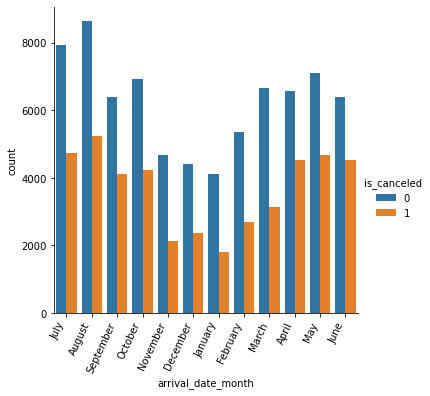

In [29]:
chart = sns.catplot(data=df, x='arrival_date_month',hue='is_canceled',kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

In [30]:
year_count = df.groupby(['arrival_date_year','is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 *x / float(x.sum()))
print(year_perct)

month_count = df.groupby(['arrival_date_month','is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100*x / float(x.sum()))
print(month_perct)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


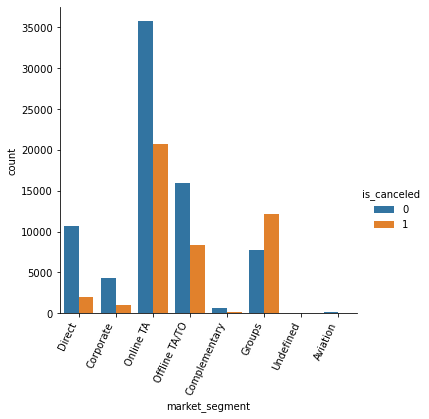

In [31]:
chart = sns.catplot(data=df , x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65 ,horizontalalignment='right')

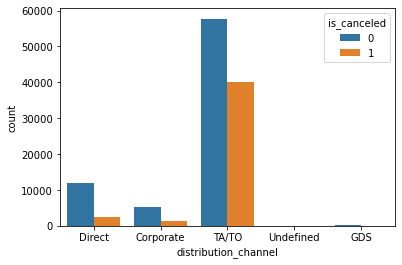

In [32]:
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


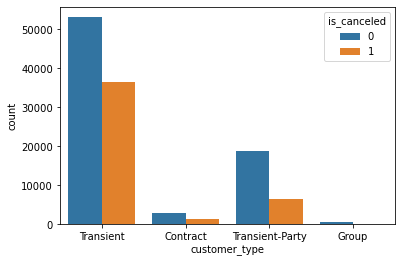

In [33]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

In [34]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

### Multivariate Analysis

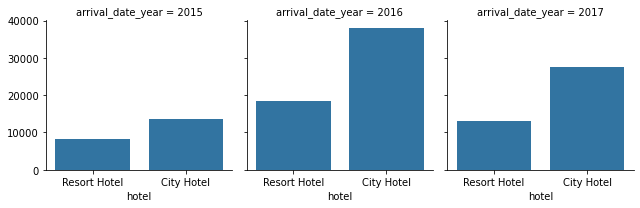

In [35]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot,'hotel')

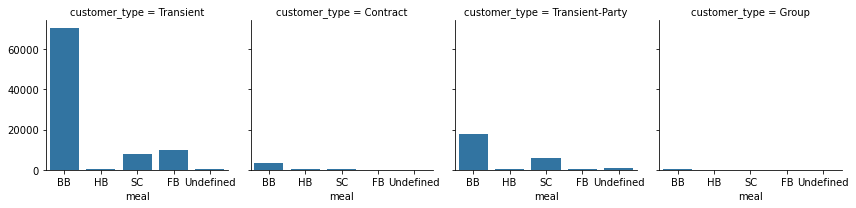

In [36]:
df['meal'].nunique(), df['customer_type'].nunique()
grid = sns.FacetGrid(df, col='customer_type')
grid.map(sns.countplot,'meal')

In [37]:
df.pivot_table(columns='hotel',values='country',aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


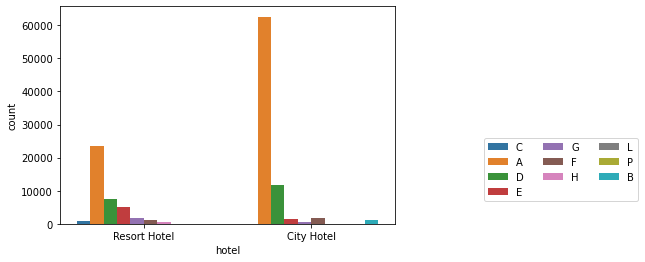

In [38]:
g = sns.countplot(data=df ,x='hotel',hue='reserved_room_type')
g.legend(loc= 'center left', bbox_to_anchor=(1.25,0.25),ncol=3)

In [39]:
print('Table 1')
print(df.groupby(['hotel','customer_type']).size().to_frame(name='size'))

Table 1
                               size
hotel        customer_type         
City Hotel   Contract          2300
             Group              293
             Transient        59404
             Transient-Party  17333
Resort Hotel Contract          1776
             Group              284
             Transient        30209
             Transient-Party   7791


In [40]:
print(df.groupby(['customer_type','deposit_type']).size())

customer_type    deposit_type
Contract         No Deposit       3530
                 Non Refund        544
                 Refundable          2
Group            No Deposit        569
                 Refundable          8
Transient        No Deposit      76684
                 Non Refund      12909
                 Refundable         20
Transient-Party  No Deposit      23858
                 Non Refund       1134
                 Refundable        132
dtype: int64


In [41]:
print(df.groupby(['customer_type','distribution_channel']).size())
print('-'*60)
print(df.groupby(['customer_type','market_segment']).size())

customer_type    distribution_channel
Contract         Corporate                  27
                 Direct                     19
                 TA/TO                    4030
Group            Corporate                  31
                 Direct                    116
                 TA/TO                     430
Transient        Corporate                4157
                 Direct                  12343
                 GDS                       193
                 TA/TO                   72919
                 Undefined                   1
Transient-Party  Corporate                2462
                 Direct                   2167
                 TA/TO                   20491
                 Undefined                   4
dtype: int64
------------------------------------------------------------
customer_type    market_segment
Contract         Complementary         2
                 Corporate            22
                 Direct               14
                 Groups     

In [42]:
print(df.groupby(['hotel', 'distribution_channel']).size())
print("-"*40)
print(df.groupby(['hotel', 'market_segment']).size())

hotel         distribution_channel
City Hotel    Corporate                3408
              Direct                   6780
              GDS                       193
              TA/TO                   68945
              Undefined                   4
Resort Hotel  Corporate                3269
              Direct                   7865
              TA/TO                   28925
              Undefined                   1
dtype: int64
----------------------------------------
hotel         market_segment
City Hotel    Aviation            237
              Complementary       542
              Corporate          2986
              Direct             6093
              Groups            13975
              Offline TA/TO     16747
              Online TA         38748
              Undefined             2
Resort Hotel  Complementary       201
              Corporate          2309
              Direct             6513
              Groups             5836
              Offline TA/TO   

In [43]:
group = df.groupby(['customer_type', 'reservation_status']).size()
group_pcts = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
group_pcts

customer_type    reservation_status
Contract         Canceled              30.323847
                 Check-Out             69.038273
                 No-Show                0.637880
Group            Canceled               9.532062
                 Check-Out             89.774697
                 No-Show                0.693241
Transient        Canceled              39.678395
                 Check-Out             59.253680
                 No-Show                1.067925
Transient-Party  Canceled              24.554211
                 Check-Out             74.570132
                 No-Show                0.875657
dtype: float64

In [44]:
df.pivot_table(columns='hotel',values=['stays_in_weekend_nights','stays_in_week_nights'],aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
stays_in_week_nights,173174,125337
stays_in_weekend_nights,63082,47664


In [45]:
df.pivot_table(columns='hotel',values='total_of_special_requests',aggfunc=lambda x:x.sum())

hotel,City Hotel,Resort Hotel
total_of_special_requests,43387,24828


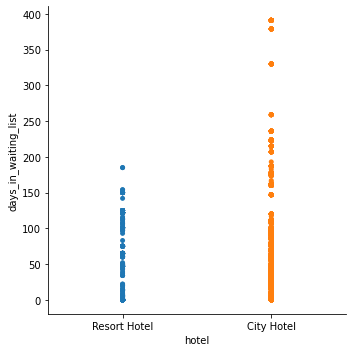

In [46]:
sns.catplot(data=df, x='hotel', y='days_in_waiting_list', jitter=False)

In [47]:
df['country'].value_counts(normalize=True)*100

PRT    41.107295
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
         ...    
AIA     0.000838
BHS     0.000838
SMR     0.000838
VGB     0.000838
MRT     0.000838
Name: country, Length: 177, dtype: float64

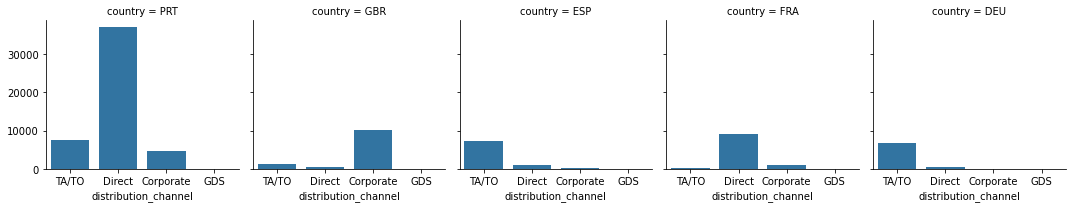

In [48]:
temp = df.loc[(df['country']=='PRT') | (df['country']=='GBR') | (df['country']=='FRA') | (df['country']=='ESP') | (df['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

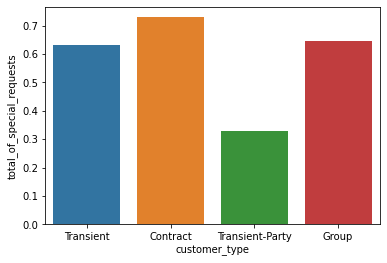

In [49]:
sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None)

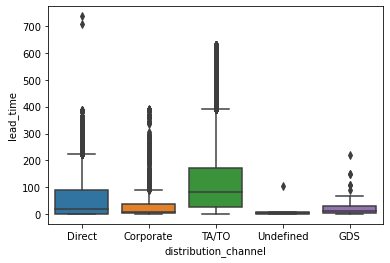

In [50]:
sns.boxplot(data=df, x='distribution_channel', y='lead_time')

# Problem Statement

In [51]:
# 1) Where do the guest come from
df[df['is_canceled']==0]['country'].value_counts()/len(df[df['is_canceled']==0])

PRT    0.285927
GBR    0.128728
FRA    0.112830
ESP    0.085025
DEU    0.080741
         ...   
ATF    0.000013
BHS    0.000013
MRT    0.000013
BWA    0.000013
ASM    0.000013
Name: country, Length: 165, dtype: float64

In [52]:
country_wise_data=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,ATF,1
161,BHS,1
162,MRT,1
163,BWA,1


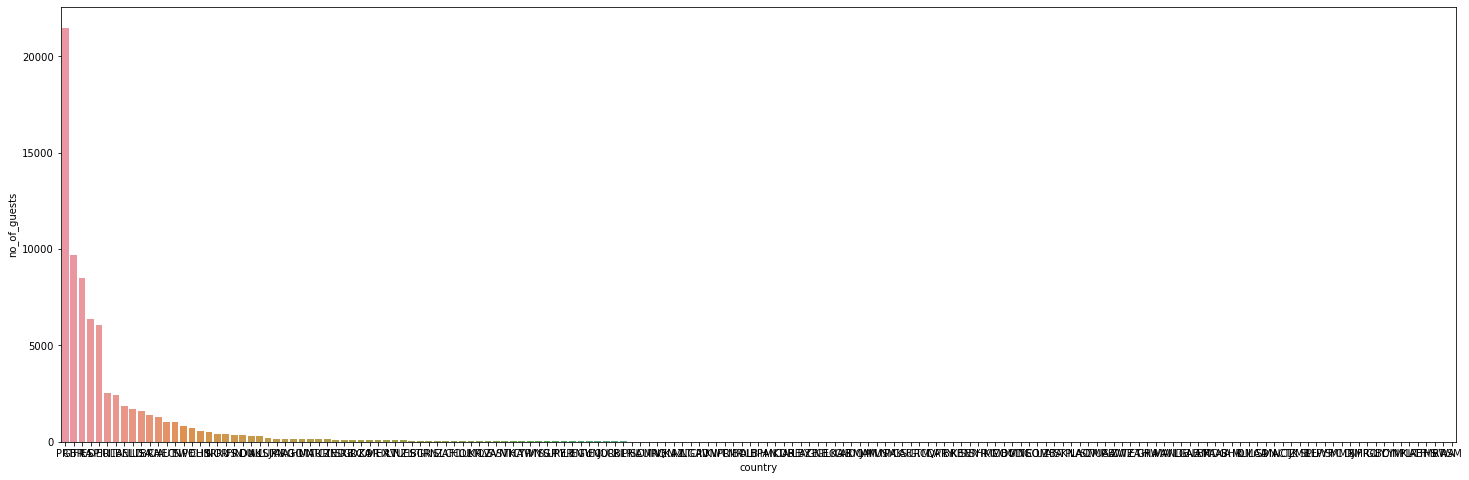

In [53]:
plt.figure(figsize=(25,8))
sns.barplot(x='country',y='no_of_guests',data=country_wise_data)

In [54]:
# 2) How much do guests pay for a room per night?
data2=df[df['is_canceled']==0]

In [55]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'Price of room types per night and person')

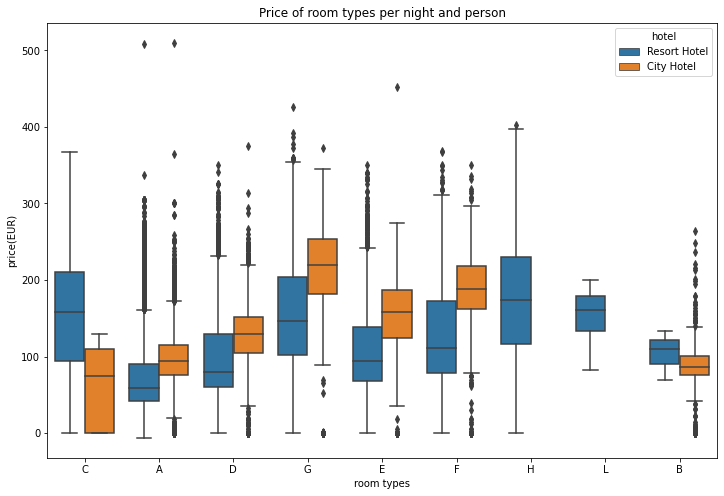

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)

plt.xlabel('room types')
plt.ylabel('price(EUR)')
plt.title('Price of room types per night and person')

In [57]:
# 3)which are the most busy month?

city_hotel=df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)]
city_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,1,No Deposit,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [58]:
resort_hotel=df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
resort_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [59]:
city_hotel_count=city_hotel['arrival_date_month'].value_counts().reset_index()
resort_hotel_count=resort_hotel['arrival_date_month'].value_counts().reset_index()

In [60]:
resort_hotel_count.columns=['month','no_of_guest_resort']
city_hotel_count.columns=['month','no_of_guests_city']

In [61]:
month_wise_data=city_hotel_count.merge(resort_hotel_count,on='month')

In [62]:
month_wise_data

,month,no_of_guests_city,no_of_guest_resort
0,August,5381,3257
1,July,4782,3137
2,May,4579,2535
3,June,4366,2038
4,October,4337,2577
5,September,4290,2102
6,March,4072,2573
7,April,4015,2550
8,February,3064,2308
9,November,2696,1976


In [63]:
#sorting the above data month wise, therefore installing some packages

#!pip install sorted_months_weekdays
#!pip install sort_dataframeby_monthorweek

In [64]:
import sort_dataframeby_monthorweek as sd

In [65]:
month_wise_data=sd.Sort_Dataframeby_Month(month_wise_data,'month')
month_wise_data

,month,no_of_guests_city,no_of_guest_resort
0,January,2254,1868
1,February,3064,2308
2,March,4072,2573
3,April,4015,2550
4,May,4579,2535
5,June,4366,2038
6,July,4782,3137
7,August,5381,3257
8,September,4290,2102
9,October,4337,2577


Text(0.5, 1.0, 'Month Wise Guest Line Graph')

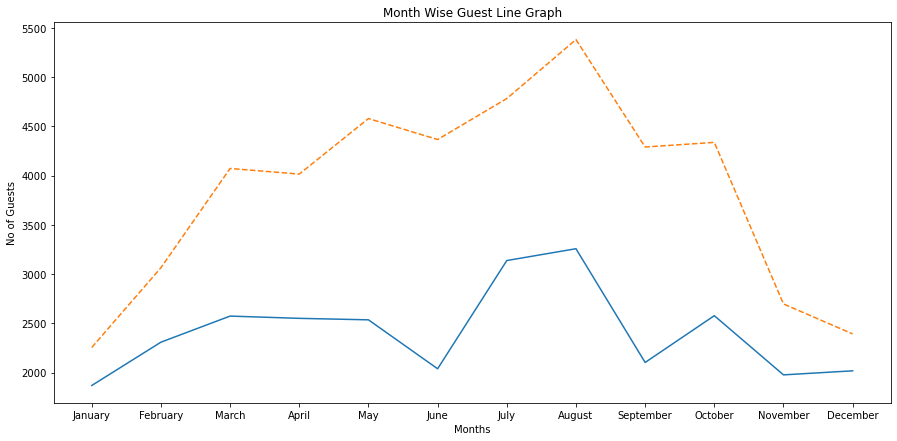

In [66]:
plt.figure(figsize=(15,7))
plt.plot(month_wise_data['month'],month_wise_data['no_of_guest_resort'])
plt.plot(month_wise_data['month'],month_wise_data['no_of_guests_city'],linestyle='dashed')

plt.xlabel('Months')
plt.ylabel('No of Guests')
plt.title('Month Wise Guest Line Graph')

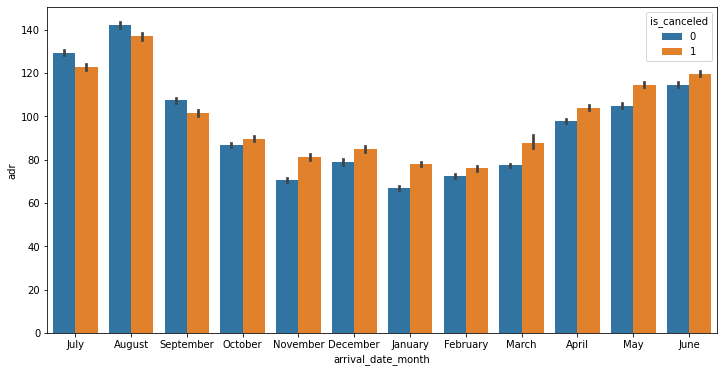

In [67]:
# which month has the highest adr(Average Daily Rate)?

plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_month',y='adr',data=df,hue='is_canceled')

#here the data is not sorted next slide will be a sorteg graph by month

In [68]:
sorted_adr=sd.Sort_Dataframeby_Month(df,'arrival_date_month')

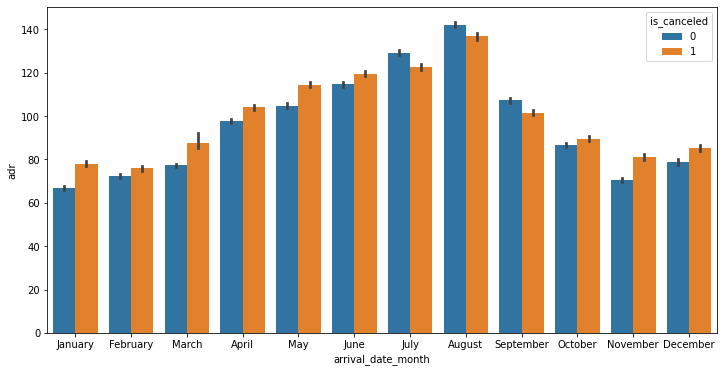

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_month',y='adr',data=sorted_adr,hue='is_canceled')

#here we can see that canceled booking has the highest adr 

(0.0, 600.0)

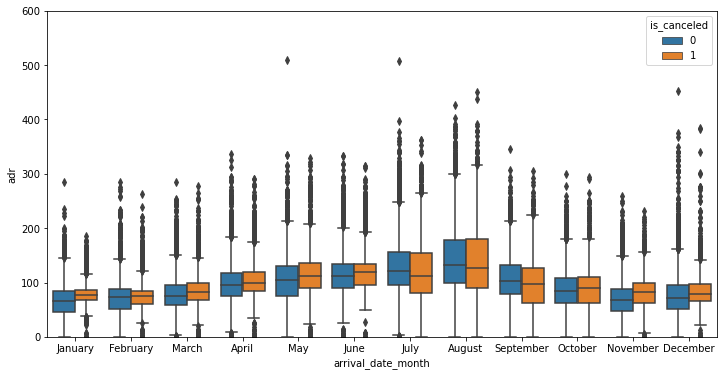

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(x='arrival_date_month',y='adr',data=sorted_adr,hue='is_canceled')
plt.ylim(0,600)

In [71]:
pd.crosstab(index=data2['stays_in_weekend_nights'],columns=data2['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,26,30,32,33,34,35,40,41,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,680,12156,9519,6739,2868,535,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3593,4502,5165,4031,1603,725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1459,3821,4126,2983,1597,5686,520,284,277,53,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,200,174,283,84,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,70,223,139,75,50,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
def week_function(row):
    
    f1='stays_in_weekend_nights'
    f2='stays_in_week_nights'
    
    if row[f1]==0 and row[f2] >0:
        return 'staying_in_weekdays'
    
    elif row[f1]>0 and row[f2]==0:
            return 'staying_in_weekends'
        
    elif row[f1] >0 and row[f2] >0:
            return 'stays_both_weekends_weekdays'
    
    else:
        return 'undefined data'            

In [73]:
data2['both']=data2.apply(week_function,axis=1)

In [74]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,both
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined data


In [75]:
data2['both'].value_counts()

stays_both_weekends_weekdays    37617
staying_in_weekdays             31817
staying_in_weekends              5052
undefined data                    680
Name: both, dtype: int64

In [76]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [77]:
data2.groupby(['arrival_date_month','both']).size()

arrival_date_month  both                        
April               staying_in_weekdays             2559
                    staying_in_weekends              344
                    stays_both_weekends_weekdays    3632
                    undefined data                    30
August              staying_in_weekdays             3141
                    staying_in_weekends              510
                    stays_both_weekends_weekdays    4938
                    undefined data                    49
December            staying_in_weekdays             2125
                    staying_in_weekends              298
                    stays_both_weekends_weekdays    1905
                    undefined data                    81
February            staying_in_weekdays             2517
                    staying_in_weekends              360
                    stays_both_weekends_weekdays    2442
                    undefined data                    53
January             staying_in_weekdays

In [78]:
grouped_data=data2.groupby(['arrival_date_month','both']).size().unstack().reset_index()

In [79]:
sorted_data=sd.Sort_Dataframeby_Month(grouped_data,'arrival_date_month')

In [80]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [81]:
sorted_data

,staying_in_weekdays,staying_in_weekends,stays_both_weekends_weekdays,undefined data
arrival_date_month,,,,
January,2126,393,1553,50
February,2517,360,2442,53
March,3061,360,3160,64
April,2559,344,3632,30
May,3021,570,3446,77
June,2687,433,3244,40
July,2822,462,4576,59
August,3141,510,4938,49
September,2695,479,3196,22


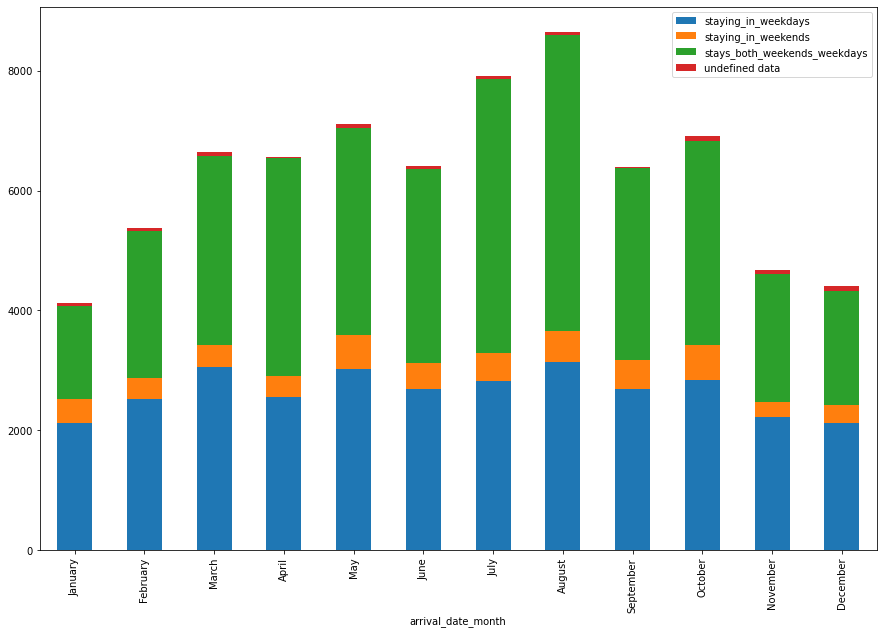

In [82]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [83]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'both'],
      dtype='object')

In [84]:
def family(row):
    if(row['adults']>0) & (row['children']>0 or row['babies']>0):
        return 1
    else:
        return 0

In [85]:
df['family']=df.apply(family,axis=1)

In [86]:
df['total_customer']=df['adults']+df['children']+df['babies']

In [87]:
df['total_nights']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [88]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2


In [89]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'family',
       'total_customer', 'total_nights'],
      dtype='object')

In [90]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [91]:
dict={'No Deposit':0, 'Refundable':0, 'Non Refund':1}

In [92]:
df['deposit_given']=df['deposit_type'].map(dict)

In [93]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [94]:
df.drop(columns=['adults', 'children', 'babies','deposit_type'],axis=1,inplace=True)

In [95]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'family', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

# Feature Engineering

In [96]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df.arrival_date_month = df.arrival_date_month.map(month_map).astype(int)

In [97]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [98]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [99]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [100]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [101]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,total_of_special_requests,reservation_status,reservation_status_date,family,total_customer,total_nights,deposit_given,arrival_date,change_in_room,total_bookings
0,Resort Hotel,0,342,2015,7,27,1,0,0,BB,...,0,Check-Out,7/1/2015,0,2.0,0,0,2015-7-1,False,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,BB,...,0,Check-Out,7/1/2015,0,2.0,0,0,2015-7-1,False,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,BB,...,0,Check-Out,7/2/2015,0,1.0,1,0,2015-7-1,True,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,BB,...,0,Check-Out,7/2/2015,0,1.0,1,0,2015-7-1,False,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,BB,...,1,Check-Out,7/3/2015,0,2.0,2,0,2015-7-1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,BB,...,0,Check-Out,9/6/2017,0,2.0,7,0,2017-8-30,False,0
119386,City Hotel,0,102,2017,8,35,31,2,5,BB,...,2,Check-Out,9/7/2017,0,3.0,7,0,2017-8-31,False,0
119387,City Hotel,0,34,2017,8,35,31,2,5,BB,...,4,Check-Out,9/7/2017,0,2.0,7,0,2017-8-31,False,0
119388,City Hotel,0,109,2017,8,35,31,2,5,BB,...,0,Check-Out,9/7/2017,0,2.0,7,0,2017-8-31,False,0


In [102]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [103]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [104]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

In [105]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [106]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,...,market_segment_6,market_segment_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,country_0,country_1,country_2
0,0,342,2015,7,27,1,0,0,BB,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,7,27,1,0,0,BB,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,7,27,1,0,1,BB,0,...,0,0,0,1,0,0,0,0,0,1
3,0,13,2015,7,27,1,0,1,BB,0,...,0,0,1,0,0,0,0,0,0,1
4,0,14,2015,7,27,1,0,2,BB,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,BB,0,...,0,0,0,0,0,1,0,1,0,0
119386,0,102,2017,8,35,31,2,5,BB,0,...,1,0,0,0,0,1,0,1,0,0
119387,0,34,2017,8,35,31,2,5,BB,0,...,1,0,0,0,0,1,0,1,0,0
119388,0,109,2017,8,35,31,2,5,BB,0,...,1,0,0,0,0,1,0,0,0,1


# Handling Outliers

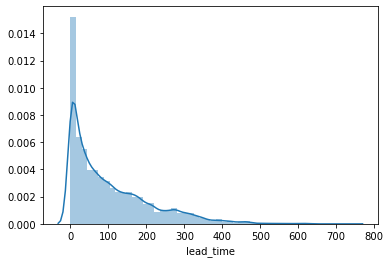

In [107]:
sns.distplot(df['lead_time'])

In [108]:
def handle_outlier(col):
    df[col]=np.log1p(df[col])
#we are using log1p(Return the natural logarithm of one plus the input array) because we are handling the 0 value in the data as seen above in the graph

In [109]:
handle_outlier('lead_time')

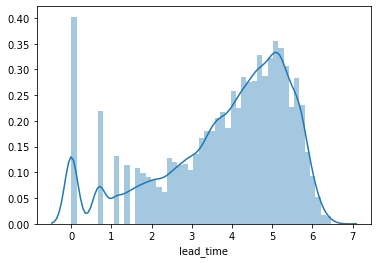

In [110]:
sns.distplot(df['lead_time'])

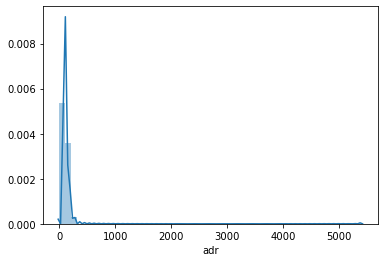

In [111]:
### working on adr
sns.distplot(df['adr'])

In [112]:
# as seen in the above graph there is a negative value so,
df[df['adr']<0]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,is_repeated_guest,...,market_segment_6,market_segment_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,country_0,country_1,country_2
14969,0,5.278115,2017,3,10,5,4,6,BB,1,...,0,0,0,1,0,0,0,0,0,1


In [113]:
handle_outlier('adr')

In [114]:
df['adr'].isnull().sum()
#as the above function(handle_outlier)is not able to handle outlier for negative value we get a missing value for that

1

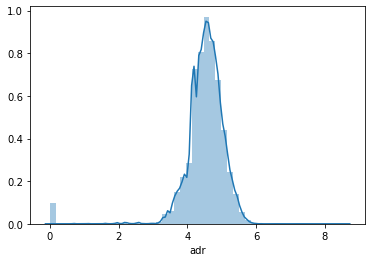

In [115]:
sns.distplot(df['adr'].dropna())

In [116]:
corr=df.corr()

In [117]:
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,...,market_segment_6,market_segment_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,country_0,country_1,country_2
is_canceled,1.000000,0.320063,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.084793,0.110133,...,-0.006288,0.005336,-0.075428,-0.151620,-0.014891,0.175944,0.005757,-0.255633,0.331595,-0.117106
lead_time,0.320063,1.000000,0.059783,0.105562,0.101689,0.009015,0.188706,0.271607,-0.236897,0.056756,...,-0.055382,-0.007486,-0.198014,-0.251981,-0.036007,0.337310,-0.007939,-0.011352,-0.046488,0.094495
arrival_date_year,0.016660,0.059783,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.010341,-0.119822,...,0.181268,-0.006691,-0.030312,-0.000604,0.016735,0.017064,-0.010580,0.145555,-0.194382,0.075757
arrival_date_month,0.011022,0.105562,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.030729,0.037479,...,-0.038521,0.001917,0.007007,-0.017284,-0.004292,0.010966,0.002612,-0.016012,0.022827,-0.010685
arrival_date_week_number,0.008148,0.101689,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.030131,0.035501,...,-0.040157,0.001455,0.007971,-0.015995,-0.003983,0.009268,0.002014,-0.016788,0.024402,-0.011967
arrival_date_day_of_month,-0.006130,0.009015,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.006145,-0.027011,...,-0.001124,-0.005499,-0.013603,0.012110,-0.001141,-0.001965,-0.007074,-0.001118,0.003092,-0.003185
stays_in_weekend_nights,-0.001791,0.188706,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,-0.087239,-0.012775,...,0.060176,-0.001753,-0.087007,-0.036528,-0.013576,0.084595,0.000469,0.071679,-0.158838,0.140098
stays_in_week_nights,0.024765,0.271607,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,-0.097245,-0.013992,...,0.041042,-0.003218,-0.088032,-0.026651,-0.023879,0.077869,-0.000340,0.039454,-0.142391,0.166627
is_repeated_guest,-0.084793,-0.236897,0.010341,-0.030729,-0.030131,-0.006145,-0.087239,-0.097245,1.000000,0.082293,...,-0.115042,-0.000743,0.281826,0.068222,-0.003747,-0.226277,-0.001175,-0.134212,0.163467,-0.044176
previous_cancellations,0.110133,0.056756,-0.119822,0.037479,0.035501,-0.027011,-0.012775,-0.013992,0.082293,1.000000,...,-0.079738,-0.000422,0.054929,-0.026364,-0.004152,-0.009890,-0.000668,-0.080057,0.100253,-0.030822


In [118]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
deposit_given                     0.481457
country_1                         0.331595
lead_time                         0.320063
change_in_room_0                  0.247770
market_segment_4                  0.221859
distribution_channel_3            0.175944
hotel_0                           0.136531
customer_type_2                   0.133084
previous_cancellations            0.110133
adr                               0.083091
days_in_waiting_list              0.054186
total_customer                    0.046522
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
distribution_channel_4            0.005757
market_segment_7                  0.005336
total_bookings                    0.003884
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
market_segm

In [119]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['is_canceled', 'deposit_given', 'country_1', 'lead_time',
       'change_in_room_0', 'market_segment_4', 'distribution_channel_3',
       'hotel_0', 'customer_type_2', 'previous_cancellations', 'adr',
       'days_in_waiting_list', 'total_customer', 'stays_in_week_nights',
       'total_nights', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'distribution_channel_4',
       'market_segment_7', 'total_bookings', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'market_segment_6', 'family',
       'market_segment_0', 'distribution_channel_2', 'customer_type_0',
       'market_segment_5', 'customer_type_1', 'market_segment_1',
       'previous_bookings_not_canceled', 'distribution_channel_0',
       'market_segment_2', 'is_repeated_guest', 'country_2', 'customer_type_3',
       'hotel_1', 'booking_changes', 'distribution_channel_1',
       'market_segment_3', 'required_car_parking_spaces',
       'total_of_special_requests', 'change_in_r

In [120]:
droping_features=['meal', 'assigned_room_type', 'reserved_room_type', 'arrival_date','reservation_status','arrival_date_year','arrival_date_week_number','stays_in_weekend_nights','arrival_date_day_of_month','reservation_status_date']

In [121]:
df.drop(droping_features,axis=1,inplace=True)

In [122]:
df.shape

(119390, 42)

In [123]:
df.dropna(inplace=True)

In [124]:
df

,is_canceled,lead_time,arrival_date_month,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,...,market_segment_6,market_segment_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,country_0,country_1,country_2
0,0,5.837730,7,0,0,0,0,3,0,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,0,6.603944,7,0,0,0,0,4,0,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0,2.079442,7,1,0,0,0,0,0,4.330733,...,0,0,0,1,0,0,0,0,0,1
3,0,2.639057,7,1,0,0,0,0,0,4.330733,...,0,0,1,0,0,0,0,0,0,1
4,0,2.708050,7,2,0,0,0,0,0,4.595120,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,3.178054,8,5,0,0,0,0,0,4.576153,...,0,0,0,0,0,1,0,1,0,0
119386,0,4.634729,8,5,0,0,0,0,0,5.422436,...,1,0,0,0,0,1,0,1,0,0
119387,0,3.555348,8,5,0,0,0,0,0,5.067079,...,1,0,0,0,0,1,0,1,0,0
119388,0,4.700480,8,5,0,0,0,0,0,4.657763,...,1,0,0,0,0,1,0,0,0,1


# Feature Selection

In [125]:
x=df.drop('is_canceled',axis=1)

In [126]:
x.shape

(119389, 41)

In [127]:
y=df['is_canceled']

In [128]:
y.shape

(119389,)

In [129]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [130]:
# Lasso(alpha=0.005)

In [131]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [132]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [133]:
feature_sel_model.get_support() #False-not selected and True-selected feature

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False])

In [134]:
cols=x.columns

In [135]:
cols,len(cols)

(Index(['lead_time', 'arrival_date_month', 'stays_in_week_nights',
        'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'booking_changes',
        'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
        'total_of_special_requests', 'family', 'total_customer', 'total_nights',
        'deposit_given', 'total_bookings', 'stay_duration', 'hotel_0',
        'hotel_1', 'customer_type_0', 'customer_type_1', 'customer_type_2',
        'customer_type_3', 'change_in_room_0', 'change_in_room_1',
        'market_segment_0', 'market_segment_1', 'market_segment_2',
        'market_segment_3', 'market_segment_4', 'market_segment_5',
        'market_segment_6', 'market_segment_7', 'distribution_channel_0',
        'distribution_channel_1', 'distribution_channel_2',
        'distribution_channel_3', 'distribution_channel_4', 'country_0',
        'country_1', 'country_2'],
       dtype='object'),
 41)

In [136]:
selected_features=cols[feature_sel_model.get_support()] #these are features which are selected

In [137]:
selected_features

Index(['lead_time', 'arrival_date_month', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given', 'stay_duration', 'hotel_0', 'customer_type_2',
       'change_in_room_0', 'market_segment_6', 'country_1'],
      dtype='object')

In [138]:
x=x[selected_features]

In [139]:
x.describe()

,lead_time,arrival_date_month,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given,stay_duration,hotel_0,customer_type_2,change_in_room_0,market_segment_6,country_1
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,3.840077,6.552513,0.087119,0.137081,0.221109,2.321169,4.476446,0.062518,0.571368,1.968238,3.427845,0.122180,-29.677391,0.664467,0.750597,0.875064,0.473050,0.411076
std,1.609790,3.090615,0.844340,1.497433,0.652288,17.594793,0.735087,0.245292,0.792800,0.722397,2.557379,0.327495,70.068217,0.472179,0.432669,0.330648,0.499275,0.492031
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-526.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.944439,4.000000,0.000000,0.000000,0.000000,0.000000,4.252630,0.000000,0.000000,2.000000,2.000000,0.000000,-26.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,4.248495,7.000000,0.000000,0.000000,0.000000,0.000000,4.560068,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.081404,9.000000,0.000000,0.000000,0.000000,0.000000,4.844187,0.000000,1.000000,2.000000,4.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.603944,12.000000,26.000000,72.000000,21.000000,391.000000,8.594339,8.000000,5.000000,55.000000,69.000000,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
x.shape

(119389, 18)

In [141]:
y.shape

(119389,)

In [142]:
y.value_counts()

0    75165
1    44224
Name: is_canceled, dtype: int64

## Building ML Model

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [145]:
X_train.shape

(89541, 18)

In [146]:
y_test.shape

(29848,)

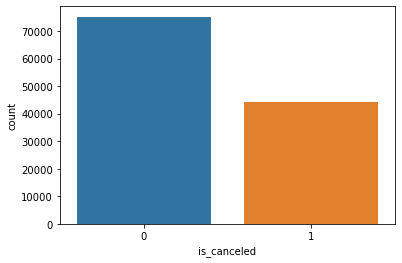

In [147]:
sns.countplot(y)

In [148]:
# from imblearn.over_sampling import SMOTE
# #Resampling the minority class. The strategy can be changed as required
# sm = SMOTE(random_state=42)
# #Fit the model to generate data
# oversampled_X, oversampled_Y = sm.fit_resample(x,y)

In [149]:
# oversampled_X.shape,oversampled_Y.shape

In [150]:
# sns.countplot(oversampled_Y)

In [151]:
# from collections import Counter
# print('Original dataset shape:{}'.format(Counter(y)))
# print('Resampled dataset shape:{}'.format(Counter(oversampled_Y)))

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
lr=LogisticRegression()

In [154]:
lr.fit(X_train,y_train)

LogisticRegression()

In [155]:
lr_prediction=lr.predict(X_test)

In [156]:
lr_prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [157]:
from sklearn.metrics import confusion_matrix

In [158]:
confusion_matrix(y_test,lr_prediction)

array([[18698,     2],
       [   23, 11125]], dtype=int64)

In [159]:
from sklearn.metrics import accuracy_score

In [160]:
accuracy_score(y_test,lr_prediction)

0.9991624229429108

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
cross_score=cross_val_score(lr,x,y,cv=10)

In [163]:
cross_score

array([0.99798978, 0.99916241, 0.99865985, 0.99891113, 0.99966496,
       0.99924617, 0.99932993, 0.99932993, 0.99966496, 0.99740325])

In [164]:
cross_score.mean()

0.9989362375680553

In [165]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
models=[]

lr=LogisticRegression()
Gnb=GaussianNB()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
# knc=KNeighborsClassifier()

models.append(('LogisticRegression',lr))
models.append(('Naive Bayes',Gnb))
models.append(('Random Forest',rfc))
models.append(('Decision Tree',dtc))
# models.append(('KNN',knc))

In [167]:
names=[]
for i in range(len(models)):
    names.append(models[i][i*0])
print(names)

['LogisticRegression', 'Naive Bayes', 'Random Forest', 'Decision Tree']


In [168]:
accuracy=[]
for name, model in models:
    print(name)
    
    model.fit(X_train,y_train)
    
    pred=model.predict(X_test)
    
    print(confusion_matrix(pred,y_test))
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    accuracy.append(acc)
    print(acc)
    print('\n')

# print(accuracy)

LogisticRegression
[[18698    23]
 [    2 11125]]


0.9991624229429108


Naive Bayes
[[16993   654]
 [ 1707 10494]]


0.920899222728491


Random Forest
[[18694     6]
 [    6 11142]]


0.9995979630125972


Decision Tree
[[18687    11]
 [   13 11137]]


0.9991959260251944




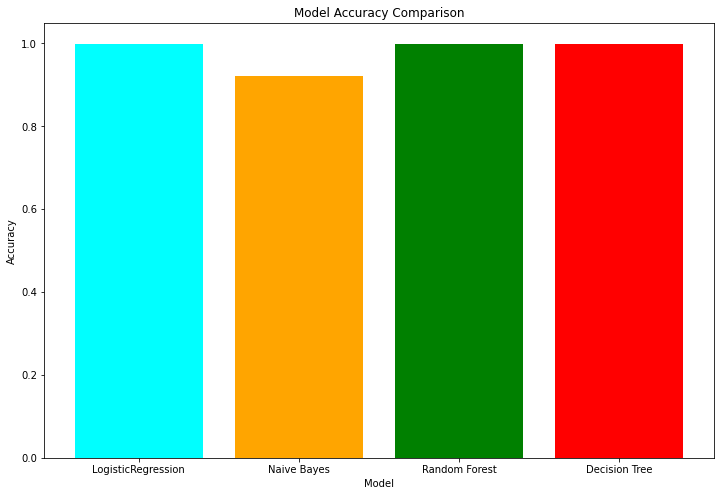

In [169]:
plt.figure(figsize=(12,8))
colors = ['cyan', 'orange', 'green', 'red', 'purple']
plt.bar(names, accuracy,color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

plt.show()

## Tuning the model with Hyperparameter

In [170]:
#Using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [171]:
param={
    'max_depth':[range(1,5),None],
    'n_estimators': range(10,100),
    'max_features':['sqrt','log2','None'],
    'criterion':['gini','entropy','log_loss'],
    'bootstrap':[True,False]        
}

In [172]:
rsrf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param,n_iter=5,scoring='neg_mean_absolute_error',verbose=3,cv=10)

rsrf.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV 1/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   2.8s
[CV 2/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   2.9s
[CV 3/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   2.5s
[CV 4/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   2.8s
[CV 5/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   2.9s
[CV 6/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.000 total time=   3.1s
[CV 7/10] END bootstrap=True, criterion=gini, max_depth=None, max_features=log2, n_estimators=63;, score=-0.001 total time=   2.5s
[CV 8/10] END bootstra

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [range(1, 5), None],
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'n_estimators': range(10, 100)},
                   scoring='neg_mean_absolute_error', verbose=3)

In [173]:
rsrf.best_params_

{'n_estimators': 63,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'bootstrap': True}

In [174]:
rsrf.best_score_

-0.0003685453799661201

In [175]:
rfc=RandomForestClassifier(n_estimators=96,max_features='log2',max_depth=None,
 criterion='gini', bootstrap=True)

In [176]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', n_estimators=96)

In [177]:
pred=rfc.predict(X_test)

In [178]:
accuracy_score(pred,y_test)

0.9995979630125972

In [179]:
print(confusion_matrix(pred,y_test))

[[18694     6]
 [    6 11142]]


### Compute the ROC

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [181]:
#Logistic Classifier
lr.fit(X_train,y_train)
ytrain_pred = lr.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = lr.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Logistic train roc-auc: 0.9999902585425169
Logistic test roc-auc: 0.999989873726181


In [182]:
#Naive Bayes
Gnb.fit(X_train,y_train)
ytrain_pred = Gnb.predict_proba(X_train)
print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = Gnb.predict_proba(X_test)
print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))


Naive Bayes train roc-auc: 0.9661375715145915
Naive Bayes test roc-auc: 0.9665769261026654


In [183]:
#Random Forest Classifier
rfc.fit(X_train,y_train)
ytrain_pred = rfc.predict_proba(X_train)
print('Random Forest train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rfc.predict_proba(X_test)
print('Random Forest test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Random Forest train roc-auc: 0.9999999997322819
Random Forest test roc-auc: 0.999949881900113


In [184]:
#Decision Tree Classifier
dtc.fit(X_train,y_train)
ytrain_pred = dtc.predict_proba(X_train)
print('Decision Tree train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = dtc.predict_proba(X_test)
print('Decision Tree test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

Decision Tree train roc-auc: 0.9999999997322819
Decision Tree test roc-auc: 0.999122818126174


In [185]:
# #KNN Classifier
# knc.fit(X_train,y_train)
# ytrain_pred = knc.predict_proba(X_train)
# print('Naive Bayes train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
# ytest_pred = knc.predict_proba(X_test)
# print('Naive Bayes test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

#### Selecting the best threshold for maximum accuracy

In [186]:
pred=[]

for model in [lr,Gnb,rfc,dtc]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc:{}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc:0.9998404068545903


In [187]:
pd.concat(pred,axis=1)

,0,1,2,3
0,3.777498e-32,4.819351e-01,0.0,0.0
1,1.000000e+00,1.000000e+00,1.0,1.0
2,1.973729e-08,5.380995e-01,0.0,0.0
3,3.283512e-23,3.333841e-12,0.0,0.0
4,1.410758e-13,1.737286e-14,0.0,0.0
...,...,...,...,...
29843,4.409955e-04,1.888787e-01,0.0,0.0
29844,2.435280e-37,0.000000e+00,0.0,0.0
29845,1.000000e+00,9.999463e-01,1.0,1.0
29846,1.000000e+00,1.000000e+00,1.0,1.0


In [188]:
final_prediction

0        1.204838e-01
1        1.000000e+00
2        1.345249e-01
3        8.334602e-13
4        3.961216e-14
             ...     
29843    4.732991e-02
29844    6.088200e-38
29845    9.999866e-01
29846    1.000000e+00
29847    1.000000e+00
Length: 29848, dtype: float64

In [189]:
### Calculate the ROC curve

fpr, tpr, thresh = roc_curve(y_test, final_prediction)


print(thresh)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.89581387e-20
 1.88197508e-20 4.48674051e-72]


In [190]:
accuracy_ls = []
for thr in thresh:
    y_pred = np.where(final_prediction>thr,1,0)
   
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresh), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds','accuracy']
accuracy_ls.sort_values(by='accuracy',ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
358,0.412156,0.999631
356,0.429885,0.999631
354,0.444773,0.999631
353,0.454678,0.999631
359,0.396417,0.999598


In [191]:
# accuracy_ls.round(5)

In [192]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1], [0,1], color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiving Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

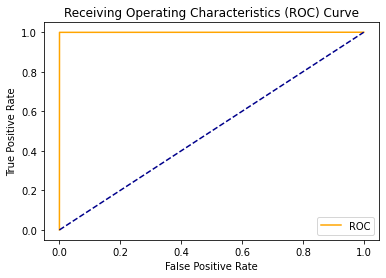

In [193]:
plot_roc_curve(fpr,tpr)

## AdaBoost

In [194]:
from sklearn.ensemble import AdaBoostClassifier

In [195]:
abc=AdaBoostClassifier(n_estimators=35, learning_rate=0.8,random_state=0)

model=abc.fit(X_train,y_train)

In [196]:
y_pred = model.predict(X_test)

In [197]:
y_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [198]:
print("Adaboost Classifier MOdel Accuracy:",accuracy_score(y_test,y_pred))

Adaboost Classifier MOdel Accuracy: 0.9995644599303136


### Gradient Boosting

In [199]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,auc

In [200]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
    gb.fit(X_train,y_train)
    print("Learning rate:",learning_rate)
    print("Accuracy score(training):{0:.3f}".format(gb.score(X_train,y_train)))
    print("Accuracy score (test):{0:.3f}".format(gb.score(X_test,y_test)))
    print()

Learning rate: 0.05
Accuracy score(training):0.811
Accuracy score (test):0.813

Learning rate: 0.1
Accuracy score(training):0.925
Accuracy score (test):0.929

Learning rate: 0.25
Accuracy score(training):0.995
Accuracy score (test):0.995

Learning rate: 0.5
Accuracy score(training):0.998
Accuracy score (test):0.998

Learning rate: 0.75
Accuracy score(training):0.999
Accuracy score (test):0.999

Learning rate: 1
Accuracy score(training):0.999
Accuracy score (test):0.999



In [201]:
# Output confusion matrix and classification report of Gradient Boosting 
#algorithm on validation set

gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.75,max_features=2,max_depth=2,random_state=0)
gb.fit(X_train,y_train)
pred = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print()
print("Classification Report")
print(classification_report(y_test, pred))
    

Confusion Matrix:
[[18692     8]
 [   13 11135]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18700
           1       1.00      1.00      1.00     11148

    accuracy                           1.00     29848
   macro avg       1.00      1.00      1.00     29848
weighted avg       1.00      1.00      1.00     29848

